<a href="https://colab.research.google.com/github/nafanur/IDA-EDA-customerchurn/blob/main/regression_logistic_churn_nafa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn Prediction**

# *Initial Data Analysis (IDA)*

## Explanation Dataset

Analisis Regresi Logistik Multiple Biner

Sumber: https://www.kaggle.com/datasets/rashadrmammadov/customer-churn-dataset

Deskripsi Variabel:
1. **customerID**: nomor identitas setiap pelanggan.
2. **Gender**: Jenis kelamin pelanggan (1: Pria, 2: Wanita).
3. **SeniorCitizen**: Apakah pelanggan adalah warga negara senior (lansia) atau bukan (1: Ya, 0: Tidak).
4. **Partner**: Apakah pelanggan memiliki pasangan atau tidak / status hubungan (1:Ya, 0: Tidak)
5. **Dependents**:  Apakah pelanggan memiliki tanggungan atau tidak  (1:Ya, 0:Tidak).
6. **Tenure**: Berapa lama pelanggan telah berlangganan. (dalam bulan)
7. **PhoneService**: Apakah pelanggan memiliki layanan telepon atau tidak (1:Ya, 0:Tidak).
8. **MultipleLines**: Apakah pelanggan memiliki lebih dari satu jalur telepon?  (2:Ya, 1:Tidak, 0: tanpa layanan telepon).
9. **InternetService**: Jenis layanan internet yang dimiliki pelanggan  (2:DSL, 1:Fiber optik,0: tanpa internet).
10. **OnlineSecurity**: Apakah pelanggan memiliki perlindungan ancaman / keamanan cyber atau tidak (2:Ya, 1:Tidak, 0:tanpa layanan internet).
11. **OnlineBackup**: Apakah pelanggan menyimpan data cadangan atau tidak (2:Ya, 1:Tidak, 0:tanpa layanan internet).
12. **DeviceProtection**: Apakah pelanggan memiliki perlindungan/asuransi perbaikan (fisik) perangkat atau tidak (2:Ya, 1:Tidak, 0:Tidak ada layanan internet).
13. **TechSupport**: Apakah pelanggan memiliki dukungan teknis atau tidak (2:Ya, 1:Tidak, 0:Tidak ada layanan internet).
14. **StreamingTV**: Apakah pelanggan memiliki TV streaming atau tidak (2:Ya, 1:Tidak, 0:Tidak ada layanan internet).
15. **StreamingMovies**: Apakah pelanggan memiliki streaming film atau tidak(2:Ya, 1:Tidak, 0:Tidak ada layanan internet).
16. **Contract**: Jangka waktu kontrak pelanggan (1:Sebulan, 2:Satu tahun, 3:Dua tahun).
17. **PaperlessBilling**: Apakah pelanggan menggunakan penagihan tanpa kertas (1:Ya, 0:Tidak).
18. **PaymentMethod**: Metode pembayaran pelanggan  (1:Cek elektronik, 2:Cek melalui pos, 3:Transfer bank, 4:Kartu kredit).
19. **MonthlyCharges**: Jumlah yang dibayar pelanggan setiap bulan. (dalam USD)
20. **TotalCharges**: Jumlah total yang dibayar oleh pelanggan selama berlangganan. (dalam USD)

**Variabel Target (y): data biner**

21. Churn: Apakah pelanggan melakukan churn atau tidak (1:Ya, 0:Tidak).


> **Latar Belakang**

>"Churn" dalam konteks bisnis dan layanan pelanggan merujuk pada situasi di mana pelanggan berhenti menggunakan produk atau layanan yang ditawarkan oleh perusahaan. Churn dapat diukur dalam periode tertentu, seperti bulanan atau tahunan, dan sering digunakan sebagai indikator kepuasan pelanggan dan stabilitas bisnis. Tingkat churn yang tinggi biasanya menunjukkan bahwa banyak pelanggan yang tidak puas atau menemukan nilai lebih baik di tempat lain, sehingga perusahaan perlu mencari cara untuk meningkatkan retensi pelanggan.



## Data Wrangling

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/customer_churn_data.csv'

In [ ]:
churn = pd.read_csv(path,sep = ";")
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,CUST5875,Male,0,Yes,Yes,71,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,74.21,5268.91,No
5876,CUST5876,Male,0,No,No,22,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,One year,No,Mailed check,65.43,1439.46,Yes
5877,CUST5877,Female,0,No,No,68,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,Yes,Bank transfer,59.78,4065.04,No
5878,CUST5878,Female,0,Yes,Yes,14,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,91.88,1286.32,No


## Data Inspection

In [ ]:
churn.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5880 non-null   object 
 1   gender            5880 non-null   object 
 2   SeniorCitizen     5880 non-null   int64  
 3   Partner           5880 non-null   object 
 4   Dependents        5880 non-null   object 
 5   tenure            5880 non-null   int64  
 6   PhoneService      5880 non-null   object 
 7   MultipleLines     5880 non-null   object 
 8   InternetService   5880 non-null   object 
 9   OnlineSecurity    5880 non-null   object 
 10  OnlineBackup      5880 non-null   object 
 11  DeviceProtection  5880 non-null   object 
 12  TechSupport       5880 non-null   object 
 13  StreamingTV       5880 non-null   object 
 14  StreamingMovies   5880 non-null   object 
 15  Contract          5880 non-null   object 
 16  PaperlessBilling  5880 non-null   object 


In [ ]:
# apakah ada data missing
churn.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Mengecek apakah ada data ganda
duplikat = churn.duplicated().sum()
duplikat

np.int64(0)

## Mereset Index

In [ ]:
churn = churn.reset_index(drop = True)
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,CUST5875,Male,0,Yes,Yes,71,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,74.21,5268.91,No
5876,CUST5876,Male,0,No,No,22,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,One year,No,Mailed check,65.43,1439.46,Yes
5877,CUST5877,Female,0,No,No,68,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,Yes,Bank transfer,59.78,4065.04,No
5878,CUST5878,Female,0,Yes,Yes,14,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,91.88,1286.32,No


## Summary Statistic

In [ ]:
## supaya 2 angka di belakang koma
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5880.00,5880.00,5880.00,5880.00
mean,0.50,36.55,70.16,2566.81
std,0.50,20.91,28.80,1910.02
min,0.00,1.00,20.00,20.03
25%,0.00,18.00,45.72,1020.22
50%,1.00,37.00,70.16,2136.44
75%,1.00,55.00,95.46,3767.66
max,1.00,72.00,119.99,8589.60


In [ ]:
churn[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,5880.00,5880.00,5880.00
mean,36.55,70.16,2566.81
std,20.91,28.80,1910.02
min,1.00,20.00,20.03
25%,18.00,45.72,1020.22
50%,37.00,70.16,2136.44
75%,55.00,95.46,3767.66
max,72.00,119.99,8589.60


In [ ]:
churn[['MonthlyCharges', 'TotalCharges']].aggregate(['sum','mean','std', 'var'])

,MonthlyCharges,TotalCharges
sum,412527.74,15092861.41
mean,70.16,2566.81
std,28.80,1910.02
var,829.71,3648167.78


### Rata-rata Total Bayaran Pelanggan berdasarkan Senior

In [ ]:
# 1: lansia, 0: bukan lansia
churn.groupby('SeniorCitizen')[['TotalCharges','MonthlyCharges']].mean()

,TotalCharges,MonthlyCharges
SeniorCitizen,,
0,2549.03,69.75
1,2584.54,70.57


### Rata - rata Total Bayaran Pelanggan berdasarkan Metode Pembayaran

In [ ]:
churn.groupby('PaymentMethod')[['TotalCharges','MonthlyCharges']].mean()

,TotalCharges,MonthlyCharges
PaymentMethod,,
Bank transfer,2593.24,71.02
Credit card,2504.62,68.47
Electronic check,2600.54,70.31
Mailed check,2570.62,70.90


# *Exploratory Data Analysis ( EDA)*

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Jitter Plot

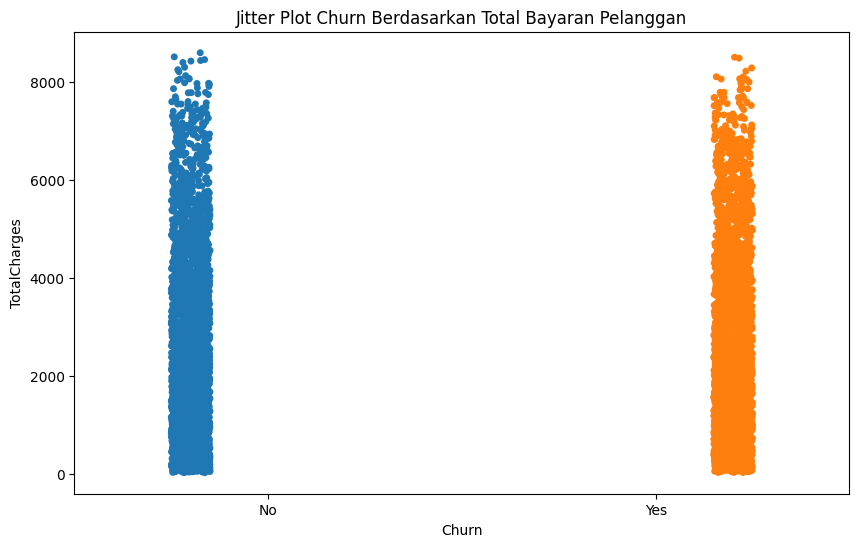

In [ ]:
# Jitter plot dengan seaborn berdasarkan rank
plt.figure(figsize=(10,6))
sns.stripplot(data= churn, x='Churn', y='TotalCharges',
              jitter=True, hue='Churn', dodge=True)
plt.title('Jitter Plot Churn Berdasarkan Total Bayaran Pelanggan')
plt.show()

## TINGKAT CHURN KESELURUHAN

In [ ]:
frek_churn = churn['Churn'].value_counts()
frek_churn

,count
Churn,
No,2982
Yes,2898


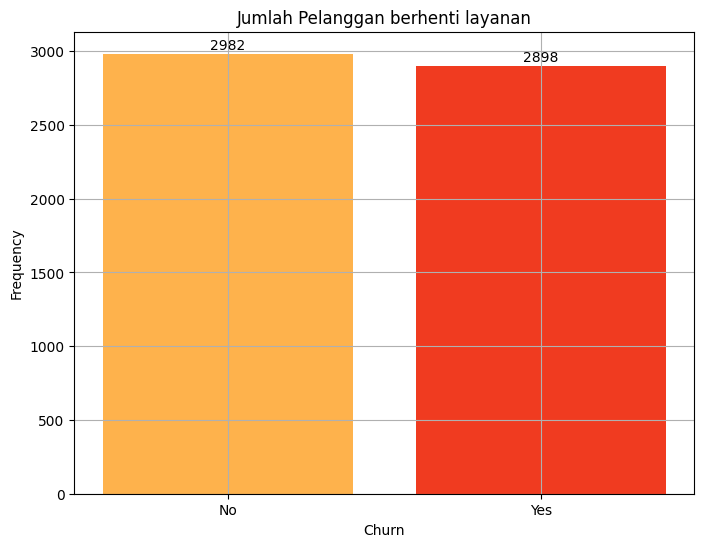

In [ ]:
# Membuat diagram batang
plt.figure(figsize=(8, 6))
bars = plt.bar(frek_churn.index,
               frek_churn.values,
               color=["#feb24c","#f03b20"])

# Menambahkan angka di atas setiap batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

plt.title('Jumlah Pelanggan berhenti layanan')
plt.xlabel('Churn')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

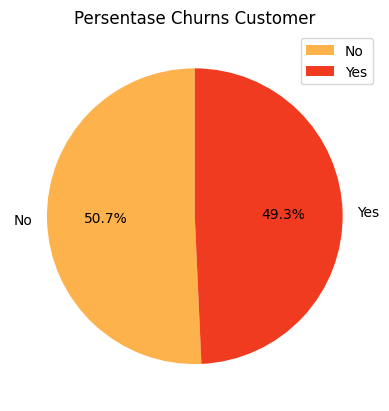

In [ ]:
# pie chart
plt.pie(frek_churn,
        labels = frek_churn.index, autopct ='%1.1f%%', startangle=90,
       colors=["#feb24c","#f03b20"])
plt.title('Persentase Churns Customer')
plt.legend()
plt.show()

> **interpretasi:** dari 5880 pelanggan, 49,3% diantaranya termasuk pelanggan yg churn.

## 5 pelanggan dengan Total biaya layanan selama berlangganan tertinggi

In [ ]:
Top5_total= churn.sort_values(by='TotalCharges', ascending=False).head(5)
Top5_total

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1765,CUST1765,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,Yes,One year,Yes,Bank transfer,119.30,8589.60,No
5082,CUST5082,Male,0,No,No,71,Yes,No,Fiber optic,Yes,...,No,No,No,Yes,One year,Yes,Bank transfer,119.79,8505.09,No
410,CUST0410,Male,1,No,Yes,72,No,No phone service,Fiber optic,Yes,...,Yes,No,No,No,Month-to-month,Yes,Credit card,118.03,8498.16,Yes
1362,CUST1362,Male,0,No,No,72,Yes,Yes,DSL,No,...,No,Yes,Yes,No,Two year,No,Credit card,117.75,8478.00,Yes
5349,CUST5349,Male,1,No,Yes,72,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card,117.35,8449.20,No


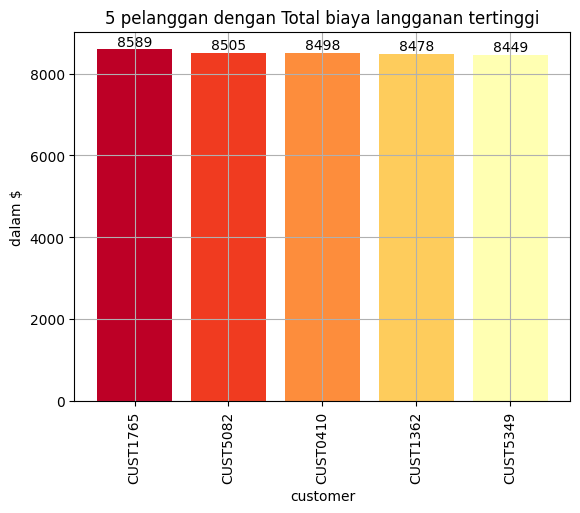

In [ ]:
bars = plt.bar(x='customerID', height='TotalCharges', data=Top5_total,
        color = ["#bd0026", "#f03b20", "#fd8d3c","#fecc5c", "#ffffb2"])

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

plt.xticks(Top5_total['customerID'], rotation='vertical')
plt.title('5 pelanggan dengan Total biaya langganan tertinggi')
plt.xlabel('customer')
plt.ylabel('dalam $')
plt.grid(True)
plt.show()

## TINGKAT CHURN BERDASARKAN DEMOGRAFI PELANGGAN

In [ ]:
# gender
gender_churn = pd.pivot_table(churn, values = 'customerID', index =['gender'],
                              columns = ['Churn'], aggfunc = 'count')
gender_churn

Churn,No,Yes
gender,,
Female,1498,1432
Male,1484,1466


<function matplotlib.pyplot.show(close=None, block=None)>

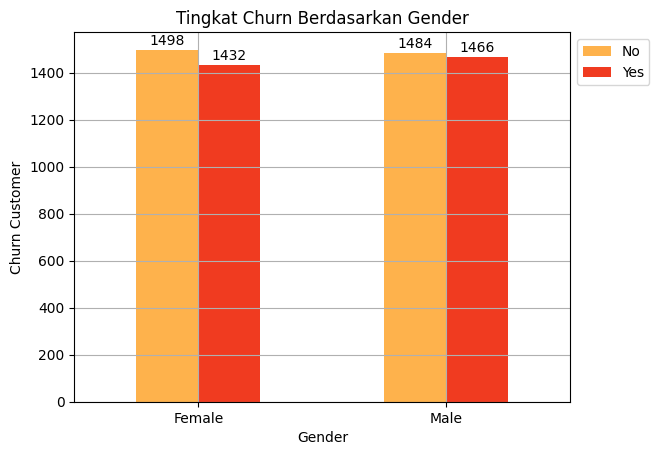

In [ ]:
bars = gender_churn.plot(kind ='bar', rot = 0,
                   title = 'Tingkat Churn Berdasarkan Gender',
                  color = ["#feb24c","#f03b20"])
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

plt.xlabel("Gender")
plt.ylabel("Churn Customer")
plt.grid(True)
plt.legend(loc ='upper left', bbox_to_anchor=(1,1))
plt.show

> **interpretasi:** customer laki-laki lebih banyak yg termasuk kategori churn daripada customer perempuan.

In [ ]:
# seniorcitizen
# 1= lansia, 0= bukan lansia
senior_churn = pd.pivot_table(churn, values = 'customerID', index =['SeniorCitizen'],
                              columns = ['Churn'], aggfunc = 'count')
senior_churn

Churn,No,Yes
SeniorCitizen,,
0,1482,1454
1,1500,1444


<function matplotlib.pyplot.show(close=None, block=None)>

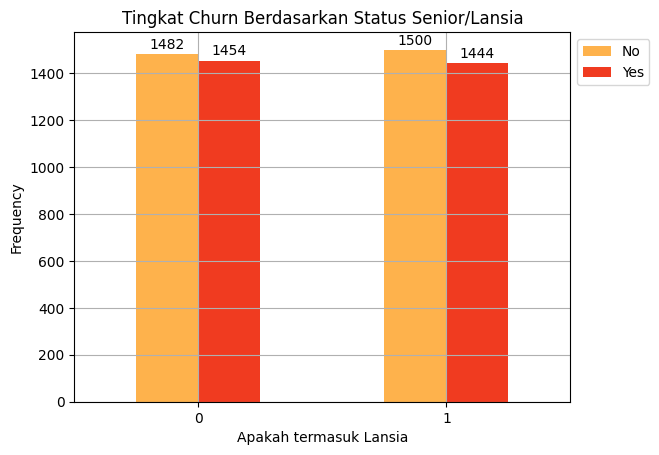

In [ ]:
bars = senior_churn.plot(kind ='bar', rot = 0,
                   title = 'Tingkat Churn Berdasarkan Status Senior/Lansia',
                  color = ["#feb24c","#f03b20"])
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

plt.xlabel("Apakah termasuk Lansia")
plt.ylabel("Frequency")
plt.grid(True)
plt.legend(loc ='upper left', bbox_to_anchor=(1,1))
plt.show

# 0 : bukan lansia
# 1 : lansia

> **interpretasi:** customer yg bukan lansia lebih banyak yg termasuk kategori churn daripada customer lansia/senior.

In [ ]:
# partner
partner_churn = pd.pivot_table(churn, values = 'customerID', index =['Partner'],
                              columns = ['Churn'], aggfunc = 'count')
partner_churn

Churn,No,Yes
Partner,,
No,1478,1407
Yes,1504,1491


<function matplotlib.pyplot.show(close=None, block=None)>

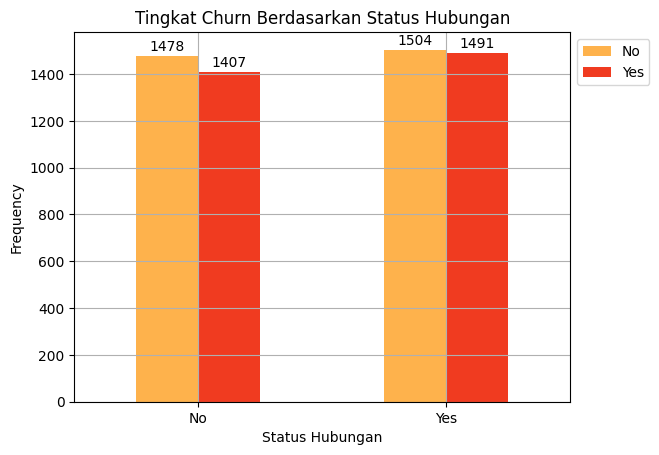

In [ ]:
bars = partner_churn.plot(kind ='bar', rot = 0,
                   title = "Tingkat Churn Berdasarkan Status Hubungan",
                  color = ["#feb24c","#f03b20"])

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

plt.xlabel("Status Hubungan")
plt.ylabel("Frequency")
plt.grid(True)
plt.legend(loc ='upper left', bbox_to_anchor=(1,1))
plt.show

> **interpretasi:** customer yg memiliki pasangan lebih banyak yg termasuk kategori churn daripada customer dengan status lajang.

In [ ]:
# dependents
tanggungan_churn = pd.pivot_table(churn, values = 'customerID', index =['Dependents'],
                              columns = ['Churn'], aggfunc = 'count')
tanggungan_churn

Churn,No,Yes
Dependents,,
No,1525,1479
Yes,1457,1419


<function matplotlib.pyplot.show(close=None, block=None)>

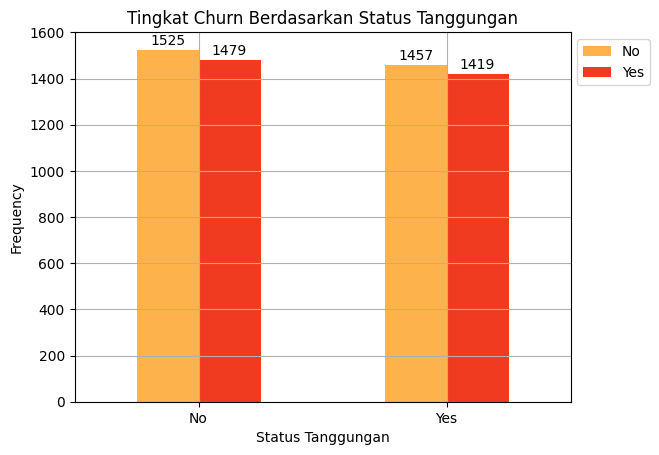

In [ ]:
bars = tanggungan_churn.plot(kind ='bar', rot = 0,
                   title = "Tingkat Churn Berdasarkan Status Tanggungan",
                  color = ["#feb24c","#f03b20"])

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

plt.xlabel("Status Tanggungan")
plt.ylabel("Frequency")
plt.grid(True)
plt.legend(loc ='upper left', bbox_to_anchor=(1,1))
plt.show

## TINGKAT CHURN BERDASARKAN LAYANAN yang telah didaftarkan oleh setiap pelanggan:

Churn           No   Yes
PhoneService            
No            1464  1475
Yes           1518  1423


<function matplotlib.pyplot.show(close=None, block=None)>

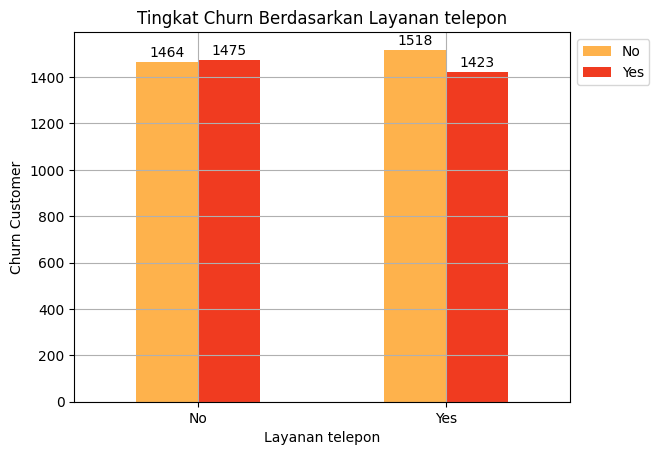

In [ ]:
# PhoneService
phone_churn = pd.pivot_table(churn, values = 'customerID', index =['PhoneService'],
                              columns = ['Churn'], aggfunc = 'count')
print(phone_churn)

# DIAGRAM BATANG
bars = phone_churn.plot(kind ='bar',
                          rot = 0,
                   title = 'Tingkat Churn Berdasarkan Layanan telepon',
                  color = ["#feb24c","#f03b20"])
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

plt.xlabel("Layanan telepon")
plt.ylabel("Churn Customer")
plt.grid(True)
plt.legend(loc ='upper left', bbox_to_anchor =(1,1))
plt.show

> Jika analisis data menunjukkan bahwa pelanggan yang memiliki layanan telepon cenderung memiliki tingkat churn yang lebih rendah, ini bisa mengindikasikan bahwa layanan telepon memberikan nilai tambah bagi pelanggan, sehingga mereka lebih cenderung tetap berlangganan. Sebaliknya, jika tingkat churn lebih tinggi di antara pelanggan dengan layanan telepon, ini bisa menjadi indikasi masalah dengan kualitas layanan atau biaya yang terlalu tinggi.

Churn               No   Yes
MultipleLines               
No                 737   692
No phone service  1464  1475
Yes                781   731


<function matplotlib.pyplot.show(close=None, block=None)>

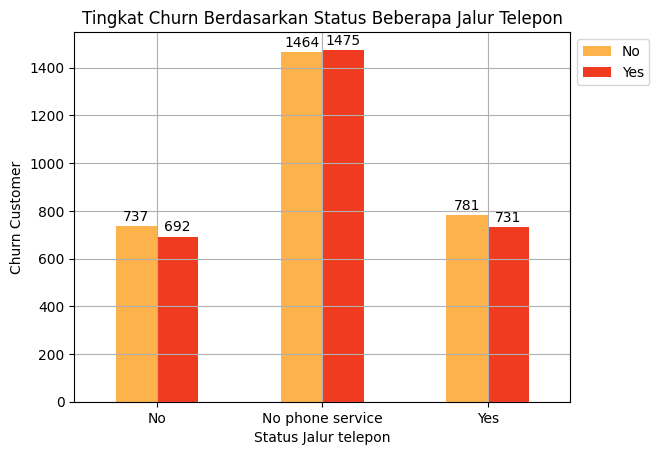

In [ ]:
# MultipleLines
jalurtelp_churn = pd.pivot_table(churn, values = 'customerID', index =['MultipleLines'],
                              columns = ['Churn'], aggfunc = 'count')
print(jalurtelp_churn)

# DIAGRAM BATANG
bars = jalurtelp_churn.plot(kind ='bar',
                          rot = 0,
                   title = 'Tingkat Churn Berdasarkan Status Beberapa Jalur Telepon',
                  color = ["#feb24c","#f03b20"])
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

plt.xlabel("Status Jalur telepon")
plt.ylabel("Churn Customer")
plt.grid(True)
plt.legend(loc ='upper left', bbox_to_anchor =(1,1))
plt.show

> Jika analisis data menunjukkan bahwa pelanggan dengan beberapa jalur telepon memiliki tingkat churn yang lebih rendah, ini bisa berarti bahwa layanan ini memberikan nilai tambah bagi mereka, sehingga mereka lebih cenderung tetap berlangganan. Sebaliknya, jika pelanggan dengan beberapa jalur telepon memiliki tingkat churn yang lebih tinggi, ini bisa menunjukkan bahwa biaya tambahan atau kualitas layanan tidak sesuai dengan harapan mereka.

Churn              No   Yes
InternetService            
DSL               987   949
Fiber optic       974   941
No               1021  1008


<function matplotlib.pyplot.show(close=None, block=None)>

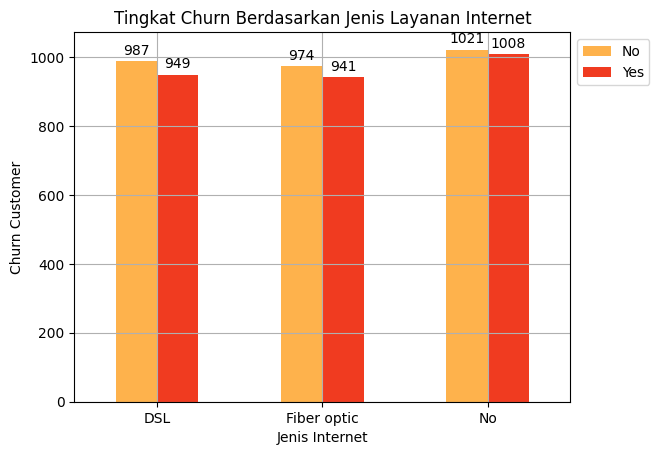

In [ ]:
# InternetService
internet_churn = pd.pivot_table(churn, values = 'customerID', index =['InternetService'],
                              columns = ['Churn'], aggfunc = 'count')
print(internet_churn)

# DIAGRAM BATANG
bars = internet_churn.plot(kind ='bar',
                          rot = 0,
                   title = 'Tingkat Churn Berdasarkan Jenis Layanan Internet',
                  color = ["#feb24c","#f03b20"])
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

plt.xlabel("Jenis Internet")
plt.ylabel("Churn Customer")
plt.grid(True)
plt.legend(loc ='upper left', bbox_to_anchor =(1,1))
plt.show

#  (2:DSL, 1:Fiber optik,0: Tidak).

> **interpretasi:**
1. Jumlah customer yg tidak mempunyai layanan internet lebih banyak dibandingkan yang punya layanan internet.
2. customer tanpa layanan internet lebih banyak yg termasuk kategori churn daripada customer yg mendapat layanan internet.
3. customer yg mendapat internet jenis DSL lebih banyak termasuk kategori churn daripada yg mendapat internet jenis fiber optic.

In [ ]:
# OnlineSecurity
security_churn = pd.pivot_table(churn, values = 'customerID', index =['OnlineSecurity'],
                              columns = ['Churn'], aggfunc = 'count')
security_churn

Churn,No,Yes
OnlineSecurity,,
No,986,961
No internet service,1021,1008
Yes,975,929


<function matplotlib.pyplot.show(close=None, block=None)>

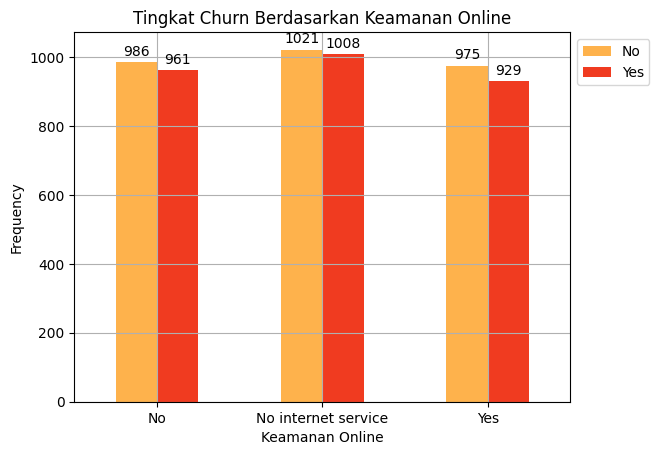

In [ ]:
bars = security_churn.plot(kind ='bar', rot = 0,
                   title = "Tingkat Churn Berdasarkan Keamanan Online",
                  color = ["#feb24c","#f03b20"])

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

plt.xlabel("Keamanan Online")
plt.ylabel("Frequency")
plt.grid(True)
plt.legend(loc ='upper left', bbox_to_anchor=(1,1))
plt.show

> **interpretasi:**
1. Jumlah customer yg tidak mempunyai layanan internet lebih banyak dibandingkan yang lain
2. customer tanpa layanan internet lebih banyak yg termasuk kategori churn daripada customer baik yg mendapat keamanan cyber maupun tidak.
3. customer yg tidak mendapat layanan keamanan cyber lebih banyak termasuk kategori churn daripada yg mendapat layanan keamanan cyber.

In [ ]:
# OnlineBackup
backup_churn = pd.pivot_table(churn, values = 'customerID', index =['OnlineBackup'],
                              columns = ['Churn'], aggfunc = 'count')
backup_churn

Churn,No,Yes
OnlineBackup,,
No,1024,962
No internet service,1021,1008
Yes,937,928


<function matplotlib.pyplot.show(close=None, block=None)>

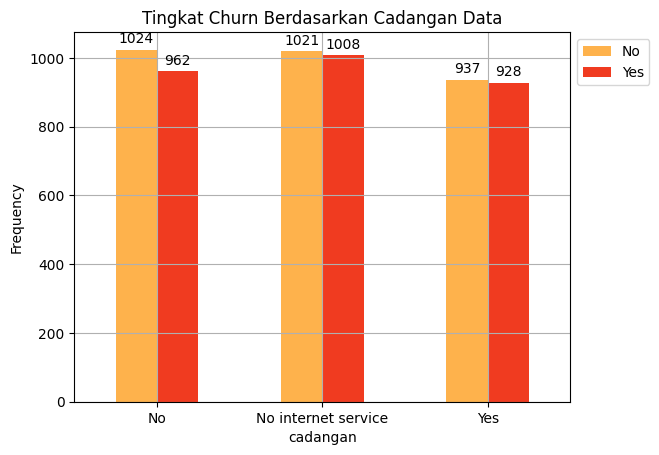

In [ ]:
bars = backup_churn.plot(kind ='bar', rot = 0,
                   title = "Tingkat Churn Berdasarkan Cadangan Data",
                  color = ["#feb24c","#f03b20"])

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

plt.xlabel("cadangan")
plt.ylabel("Frequency")
plt.grid(True)
plt.legend(loc ='upper left', bbox_to_anchor=(1,1))
plt.show

In [ ]:
# TechSupport
teknis_churn = pd.pivot_table(churn, values = 'customerID', index =['TechSupport'],
                              columns = ['Churn'], aggfunc = 'count')
teknis_churn

Churn,No,Yes
TechSupport,,
No,966,966
No internet service,1021,1008
Yes,995,924


<function matplotlib.pyplot.show(close=None, block=None)>

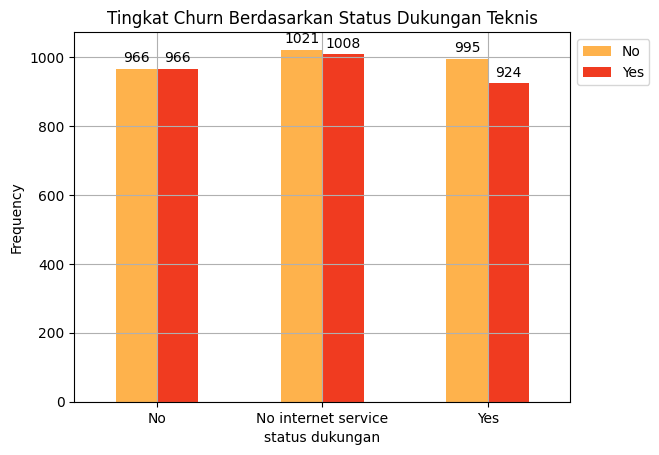

In [ ]:
bars = teknis_churn.plot(kind ='bar', rot = 0,
                   title = "Tingkat Churn Berdasarkan Status Dukungan Teknis",
                  color = ["#feb24c","#f03b20"])

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

plt.xlabel("status dukungan")
plt.ylabel("Frequency")
plt.grid(True)
plt.legend(loc ='upper left', bbox_to_anchor=(1,1))
plt.show

In [ ]:
# StreamingTv
StreamingTV_churn = pd.pivot_table(churn, values = 'customerID', index =['StreamingTV'],
                              columns = ['Churn'], aggfunc = 'count')
StreamingTV_churn

Churn,No,Yes
StreamingTV,,
No,966,943
No internet service,1021,1008
Yes,995,947


<function matplotlib.pyplot.show(close=None, block=None)>

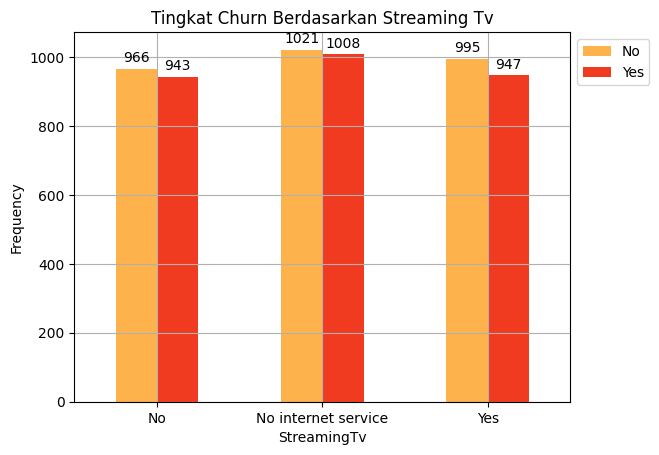

In [ ]:
bars = StreamingTV_churn.plot(kind ='bar', rot = 0,
                   title = "Tingkat Churn Berdasarkan Streaming Tv",
                  color = ["#feb24c","#f03b20"])

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

plt.xlabel("StreamingTv")
plt.ylabel("Frequency")
plt.grid(True)
plt.legend(loc ='upper left', bbox_to_anchor=(1,1))
plt.show

In [ ]:
# StreamingMovies
StreamingMovies_churn = pd.pivot_table(churn, values = 'customerID', index =['StreamingMovies'],
                              columns = ['Churn'], aggfunc = 'count')
StreamingMovies_churn

Churn,No,Yes
StreamingMovies,,
No,966,954
No internet service,1021,1008
Yes,995,936


<function matplotlib.pyplot.show(close=None, block=None)>

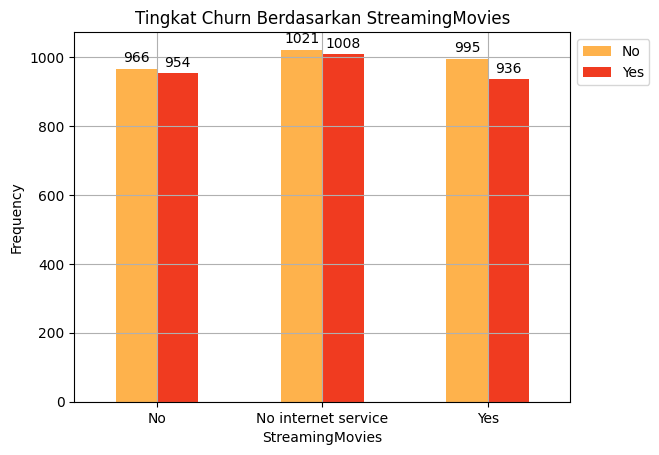

In [ ]:
# StreamingMovies
bars = StreamingMovies_churn.plot(kind ='bar', rot = 0,
                   title = "Tingkat Churn Berdasarkan StreamingMovies",
                  color = ["#feb24c","#f03b20"])

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

plt.xlabel("StreamingMovies")
plt.ylabel("Frequency")
plt.grid(True)
plt.legend(loc ='upper left', bbox_to_anchor=(1,1))
plt.show

In [ ]:
# DeviceProtection
protection_churn = pd.pivot_table(churn, values = 'customerID', index =['DeviceProtection'],
                              columns = ['Churn'], aggfunc = 'count')
protection_churn

Churn,No,Yes
DeviceProtection,,
No,1000,925
No internet service,1021,1008
Yes,961,965


<function matplotlib.pyplot.show(close=None, block=None)>

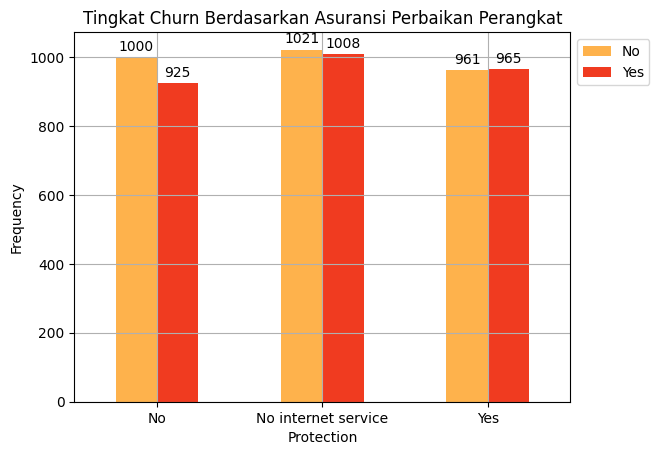

In [ ]:
bars = protection_churn.plot(kind ='bar', rot = 0,
                   title = "Tingkat Churn Berdasarkan Asuransi Perbaikan Perangkat",
                  color = ["#feb24c","#f03b20"])

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

plt.xlabel("Protection")
plt.ylabel("Frequency")
plt.grid(True)
plt.legend(loc ='upper left', bbox_to_anchor=(1,1))
plt.show

> **interpretasi:**
1. Jumlah customer yg tidak mempunyai layanan internet lebih banyak dibandingkan yang lain
2. customer tanpa layanan internet lebih banyak yg termasuk kategori churn daripada customer baik yg mendapat jaminan perbaikan perangkat maupun tidak.
3. customer yg mendapat jaminan perbaikan perangkat lebih banyak termasuk kategori churn daripada yg tidak jaminan perbaikan perangkat.

## TINGKAT CHURN BERDASARKAN INFORMASI AKUN PELANGGAN

In [ ]:
kontrak_churn = pd.pivot_table(churn, values = 'customerID', index =['Contract'],
                              columns = ['Churn'], aggfunc = 'count')
kontrak_churn

Churn,No,Yes
Contract,,
Month-to-month,1056,964
One year,968,986
Two year,958,948


<function matplotlib.pyplot.show(close=None, block=None)>

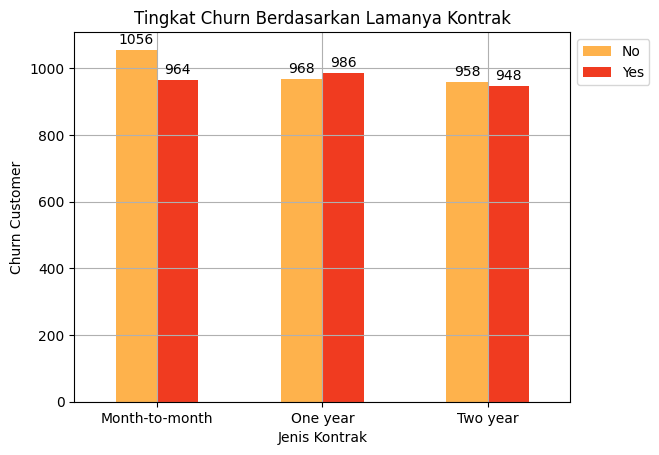

In [ ]:
bars = kontrak_churn.plot(kind ='bar', rot = 0,
                   title = 'Tingkat Churn Berdasarkan Lamanya Kontrak',
                  color = ["#feb24c","#f03b20"])
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

plt.xlabel("Jenis Kontrak")
plt.ylabel("Churn Customer")
plt.grid(True)
plt.legend(loc ='upper left', bbox_to_anchor=(1,1))
plt.show

# Menggunakan bars.patches untuk mendapatkan daftar patch yang mewakili setiap bar dalam plot.

> **interpretasi:** customer yg lama kontraknya 1 tahun lebih mudah churn daripada customer yg mengambil kontrak bulanan ataupun 2 tahun.

In [ ]:
# PaperlessBilling
kertasless_churn = pd.pivot_table(churn, values = 'customerID', index =['PaperlessBilling'],
                              columns = ['Churn'], aggfunc = 'count')
kertasless_churn

Churn,No,Yes
PaperlessBilling,,
No,1517,1473
Yes,1465,1425


<function matplotlib.pyplot.show(close=None, block=None)>

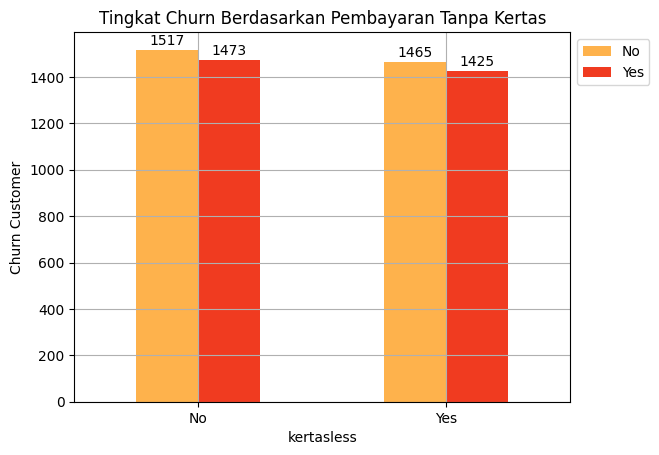

In [ ]:
bars = kertasless_churn.plot(kind ='bar', rot = 0,
                   title = 'Tingkat Churn Berdasarkan Pembayaran Tanpa Kertas',
                  color = ["#feb24c","#f03b20"])
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

plt.xlabel("kertasless")
plt.ylabel("Churn Customer")
plt.grid(True)
plt.legend(loc ='upper left', bbox_to_anchor=(1,1))
plt.show

In [ ]:
# PaymentMethod
bayar_churn = pd.pivot_table(churn, values = 'customerID', index =['PaymentMethod'],
                              columns = ['Churn'], aggfunc = 'count')
bayar_churn

Churn,No,Yes
PaymentMethod,,
Bank transfer,735,692
Credit card,753,750
Electronic check,752,736
Mailed check,742,720


<function matplotlib.pyplot.show(close=None, block=None)>

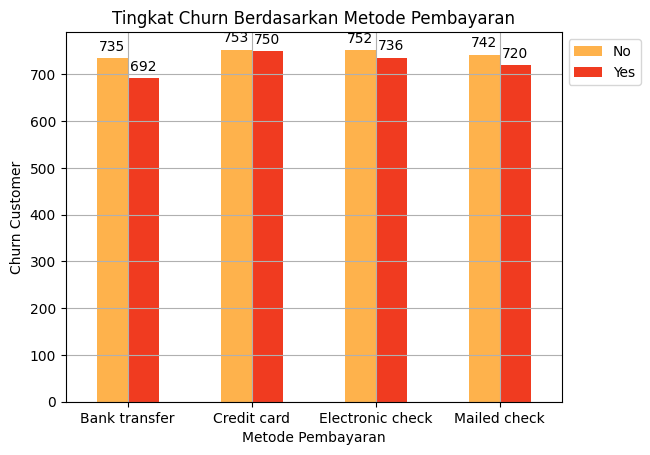

In [ ]:
bars = bayar_churn.plot(kind ='bar', rot = 0,
                   title = 'Tingkat Churn Berdasarkan Metode Pembayaran',
                  color = ["#feb24c","#f03b20"])
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

plt.xlabel("Metode Pembayaran")
plt.ylabel("Churn Customer")
plt.grid(True)
plt.legend(loc ='upper left', bbox_to_anchor=(1,1))
plt.show

## **PIE CHART & DONUT CHART**

### hanya customer yang mengalami churn (berhenti berlangganan)

In [ ]:
churn_yes = churn[churn['Churn']== 'Yes']
churn_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes
6,CUST0006,Male,0,Yes,No,17,No,No phone service,DSL,No,...,No,Yes,No,Yes,One year,Yes,Bank transfer,91.53,1556.01,Yes
7,CUST0007,Male,0,Yes,Yes,18,Yes,No,DSL,No,...,Yes,Yes,No,Yes,One year,No,Mailed check,26.52,477.36,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5872,CUST5872,Male,0,Yes,No,34,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,Yes,One year,Yes,Electronic check,98.10,3335.40,Yes
5873,CUST5873,Female,1,Yes,No,27,No,No phone service,Fiber optic,No,...,No,Yes,No,Yes,Two year,Yes,Electronic check,34.06,919.62,Yes
5874,CUST5874,Male,0,No,Yes,37,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,56.74,2099.38,Yes
5876,CUST5876,Male,0,No,No,22,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,One year,No,Mailed check,65.43,1439.46,Yes


# Demographic customer information

gender
Female    1432
Male      1466
Name: Churn, dtype: int64


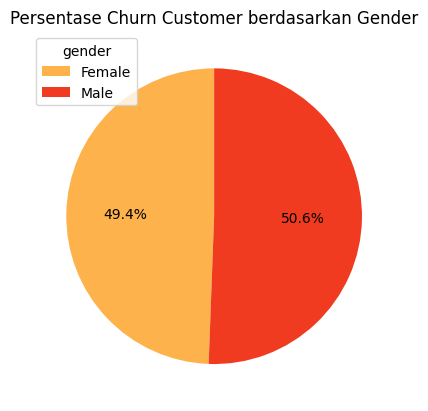

In [ ]:
# GENDER
jk = churn_yes.groupby('gender')['Churn'].count()
print(jk)

# pie chart
plt.pie(jk,
        autopct ='%1.1f%%',
        startangle = 90,
       colors=["#feb24c","#f03b20"])

plt.title('Persentase Churn Customer berdasarkan Gender')
plt.legend(labels = jk.index,
           loc ="upper left",
           title="gender")
plt.show()

SeniorCitizen
0    1454
1    1444
Name: Churn, dtype: int64


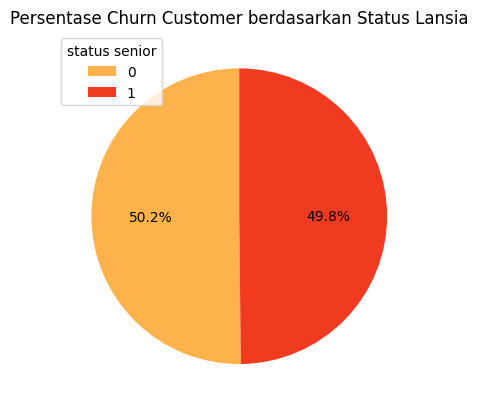

In [ ]:
# SENIOR CITIZEN
lansia = churn_yes.groupby('SeniorCitizen')['Churn'].count()
print(lansia)

# pie chart
plt.pie(lansia,
        autopct ='%1.1f%%',
        startangle = 90,
       colors=["#feb24c","#f03b20"])
plt.title('Persentase Churn Customer berdasarkan Status Lansia')
plt.legend(labels = lansia.index,
           loc ="upper left",
           title="status senior")
plt.show()

Partner
No     1407
Yes    1491
Name: Churn, dtype: int64


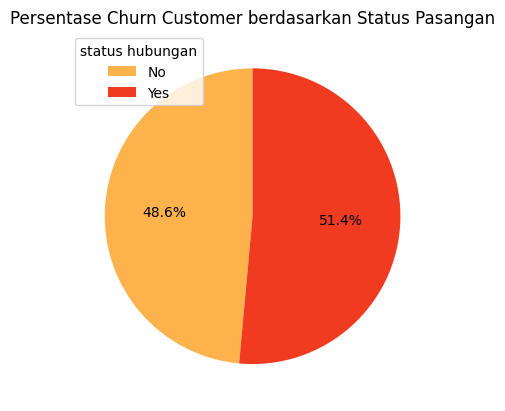

In [ ]:
# PARTNER
partner = churn_yes.groupby('Partner')['Churn'].count()
print(partner)

plt.pie(partner,
       autopct = '%1.1f%%',
       startangle = 90,
       colors=["#feb24c","#f03b20"])
plt.title('Persentase Churn Customer berdasarkan Status Pasangan')
plt.legend(labels = partner.index,
           loc ="upper left",
           title="status hubungan")
plt.show()

Dependents
No     1479
Yes    1419
Name: Churn, dtype: int64


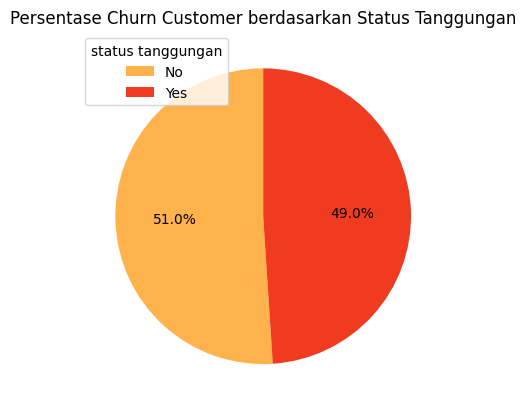

In [ ]:
# DEPENDENTS
Dependents= churn_yes.groupby('Dependents')['Churn'].count()
print(Dependents)

plt.pie(Dependents,
       autopct = '%1.1f%%',
       startangle = 90,
       colors=["#feb24c","#f03b20"])
plt.title('Persentase Churn Customer berdasarkan Status Tanggungan')
plt.legend(labels = Dependents.index,
           loc ="upper left",
           title="status tanggungan")
plt.show()

# Services that each customer has signed up for

PhoneService
No     1475
Yes    1423
Name: Churn, dtype: int64


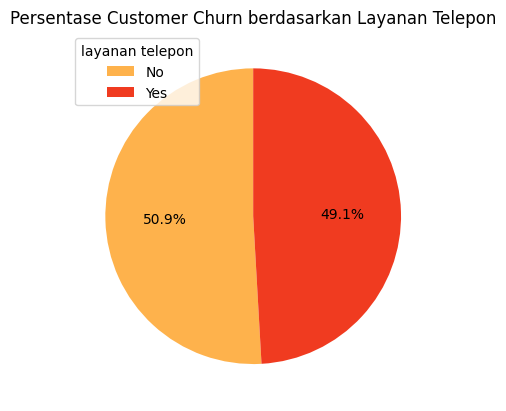

In [ ]:
# PhoneService
phone = churn_yes.groupby('PhoneService')['Churn'].count()
print(phone)

plt.pie(phone,
       autopct = '%1.1f%%',
       startangle = 90,
       colors=["#feb24c","#f03b20"])
plt.title('Persentase Customer Churn berdasarkan Layanan Telepon')
plt.legend(labels = phone.index,
           loc ="upper left",
           title="layanan telepon")
plt.show()

> **interpretasi:** Jika analisis data menunjukkan bahwa pelanggan yang memiliki layanan telepon cenderung memiliki tingkat churn yang lebih rendah, ini bisa mengindikasikan bahwa layanan telepon memberikan nilai tambah yang signifikan bagi pelanggan, sehingga mereka lebih cenderung tetap berlangganan. Sebaliknya, jika tingkat churn lebih tinggi di antara pelanggan dengan layanan telepon, ini bisa menjadi indikasi masalah dengan kualitas layanan atau biaya yang terlalu tinggi.

MultipleLines
No                   692
No phone service    1475
Yes                  731
Name: Churn, dtype: int64


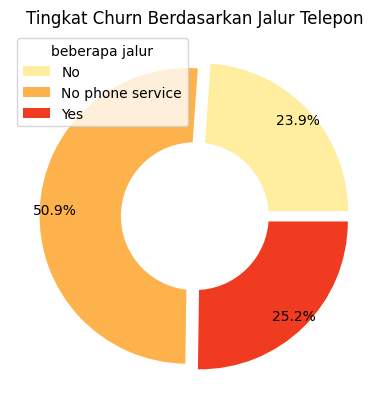

In [ ]:
# MultipleLines
jalur_telepon = churn_yes.groupby('MultipleLines')['Churn'].count()
print(jalur_telepon)

# explosion
explode = (0.05, 0.05, 0.05)

# Pie Chart
plt.pie(jalur_telepon,
        colors =["#ffeda0","#feb24c","#f03b20"],
        autopct ='%1.1f%%',
        pctdistance = 0.9,
        explode = explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc ='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('Tingkat Churn Berdasarkan Jalur Telepon')
labels =jalur_telepon.index
# Add Legends
plt.legend(labels,
           loc ="upper left",
           title="beberapa jalur")
plt.show()

InternetService
DSL             949
Fiber optic     941
No             1008
Name: Churn, dtype: int64


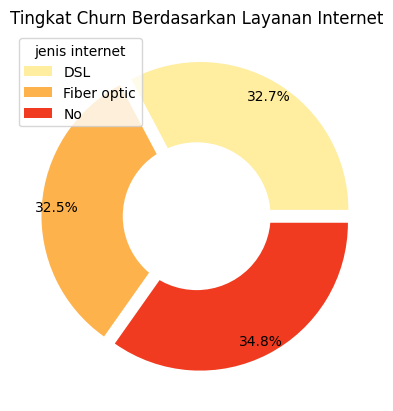

In [ ]:
# InternetService
layanan = churn_yes.groupby('InternetService')['Churn'].count()
print(layanan)

# explosion
explode = (0.05, 0.05, 0.05)

# Pie Chart
plt.pie(layanan,
        colors=["#ffeda0","#feb24c","#f03b20"],
        autopct='%1.1f%%',
        pctdistance = 0.9,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc ='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('Tingkat Churn Berdasarkan Layanan Internet')
labels =layanan.index
# Add Legends
plt.legend(labels,
           loc ="upper left",
           title="jenis internet")
plt.show()

> **interpretasi:** Pelanggan yg tidak mendapatkan internet lebih banyak churn (34,8%) daripada yg mendapatkan internet. Diantara DCL atau FIBER OPTIC, layanan internet yg paling menguntungkan adalah DSL, meskipun hanya berbanding tipis.  

OnlineSecurity
No                      961
No internet service    1008
Yes                     929
Name: Churn, dtype: int64


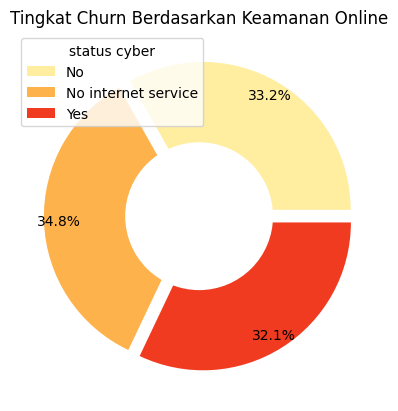

In [ ]:
# OnlineSecurity
keamanan = churn_yes.groupby('OnlineSecurity')['Churn'].count()
print(keamanan)

# explosion
explode = (0.05, 0.05, 0.05)

# Pie Chart
plt.pie(keamanan,
        colors =["#ffeda0","#feb24c","#f03b20"],
        autopct ='%1.1f%%',
        pctdistance = 0.9,
        explode = explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc ='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('Tingkat Churn Berdasarkan Keamanan Online')
labels = keamanan.index
# Add Legends
plt.legend(labels,
           loc ="upper left",
           title="status cyber")
plt.show()

OnlineBackup
No                      962
No internet service    1008
Yes                     928
Name: Churn, dtype: int64


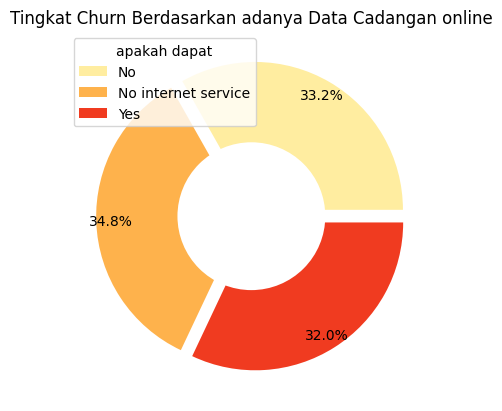

In [ ]:
# OnlineBackup
backup = churn_yes.groupby('OnlineBackup')['Churn'].count()
print(backup)

# explosion
explode = (0.05, 0.05, 0.05)

# Pie Chart
plt.pie(backup,
        colors =["#ffeda0","#feb24c","#f03b20"],
        autopct ='%1.1f%%',
        pctdistance = 0.9,
        explode = explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc ='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('Tingkat Churn Berdasarkan adanya Data Cadangan online')
labels = backup.index
# Add Legends
plt.legend(labels,
           loc ="upper left",
           title="apakah dapat")
plt.show()

DeviceProtection
No                      925
No internet service    1008
Yes                     965
Name: Churn, dtype: int64


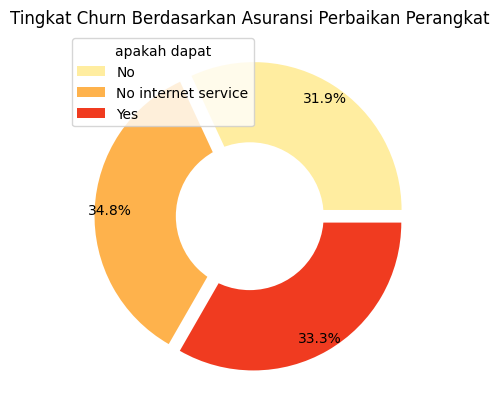

In [ ]:
# DeviceProtection
asuransi = churn_yes.groupby('DeviceProtection')['Churn'].count()
print(asuransi)

# explosion
explode = (0.05, 0.05, 0.05)

# Pie Chart
plt.pie(asuransi,
        colors=["#ffeda0","#feb24c","#f03b20"],
        autopct='%1.1f%%',
        pctdistance = 0.9,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc ='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('Tingkat Churn Berdasarkan Asuransi Perbaikan Perangkat')
labels =asuransi.index
# Add Legends
plt.legend(labels,
           loc ="upper left",
           title="apakah dapat")
plt.show()

> **interpretasi**: Data menunjukkan bahwa memiliki atau tidak memiliki proteksi/perlindungan (asuransi perbaikan) perangkat tidak berdampak signifikan pada tingkat churn. Sebaliknya, fokus harus diarahkan pada pelanggan tanpa layanan internet yang memiliki proporsi churn tertinggi.

TechSupport
No                      966
No internet service    1008
Yes                     924
Name: Churn, dtype: int64


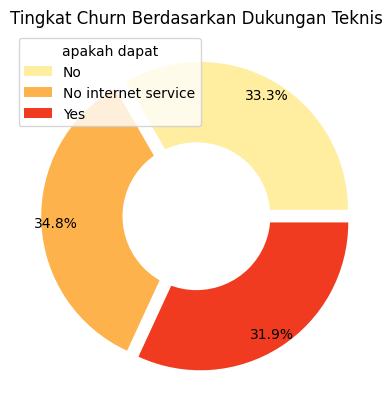

In [ ]:
# TechSupport
teknis = churn_yes.groupby('TechSupport')['Churn'].count()
print(teknis)

# explosion
explode = (0.05, 0.05, 0.05)

# Pie Chart
plt.pie(teknis,
        colors=["#ffeda0","#feb24c","#f03b20"],
        autopct='%1.1f%%',
        pctdistance = 0.9,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc ='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('Tingkat Churn Berdasarkan Dukungan Teknis')
labels =teknis.index
# Add Legends
plt.legend(labels,
           loc ="upper left",
           title="apakah dapat")
plt.show()

StreamingTV
No                      943
No internet service    1008
Yes                     947
Name: Churn, dtype: int64


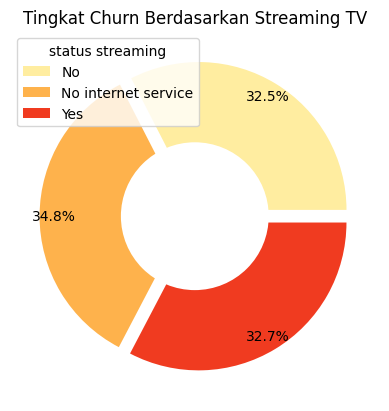

In [ ]:
# StreamingTV
tv = churn_yes.groupby('StreamingTV')['Churn'].count()
print(tv)

# explosion
explode = (0.05, 0.05, 0.05)

# Pie Chart
plt.pie(tv,
        colors=["#ffeda0","#feb24c","#f03b20"],
        autopct='%1.1f%%',
        pctdistance = 0.9,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc ='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('Tingkat Churn Berdasarkan Streaming TV')
labels = tv.index
# Add Legends
plt.legend(labels,
           loc ="upper left",
           title="status streaming")
plt.show()

> **Interpretasi:** Dari 2898 customer churn, 34,8% diantaranya adalah customer tanpa layanan internet dan mengalami churn.
32,7% diantaranya adalah customer yg mendapat streaming tv, namun mengalami churn (tetap berhenti berlangganan).
> Kemungkinan penyebab churn:
1. Kualitas layanan streaming yang tidak memuaskan.
2. Biaya layanan yang terlalu tinggi dibandingkan nilai yang dirasakan.
3. dukungan pelanggan yang kurang memadai atau masalah teknis yang berkelanjutan.

StreamingMovies
No                      954
No internet service    1008
Yes                     936
Name: Churn, dtype: int64


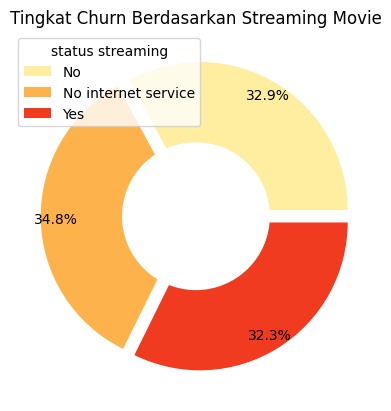

In [ ]:
# StreamingMovies
movie = churn_yes.groupby('StreamingMovies')['Churn'].count()
print(movie)

# explosion
explode = (0.05, 0.05, 0.05)

# Pie Chart
plt.pie(movie,
        colors=["#ffeda0","#feb24c","#f03b20"],
        autopct='%1.1f%%',
        pctdistance = 0.9,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc ='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('Tingkat Churn Berdasarkan Streaming Movie')
labels = movie.index
# Add Legends
plt.legend(labels,
           loc ="upper left",
           title="status streaming")
plt.show()

> **Interpretasi:** Dari 2898 customer churn, 34,8% diantaranya adalah customer tanpa layanan internet.
32,9% diantaranya adalah pelanggan tidak memiliki layanan streaming movies dan memutuskan untuk berhenti berlangganan.
Kemungkinan penyebab churn:
1. Pelanggan menginginkan layanan hiburan yang lebih lengkap, termasuk streaming movies.
2. Kompetitor menawarkan paket dengan layanan streaming movies yang lebih menarik.
3. Kualitas atau nilai layanan yang dirasakan tidak cukup memadai tanpa akses ke streaming movies.

*NB: Kompetitor: perusahaan yang beroperasi dalam industri yang sama dan menawarkan produk atau layanan yang dapat menggantikan atau bersaing dengan produk atau layanan perusahaan lain.*

## Customer account information

Contract
Month-to-month    964
One year          986
Two year          948
Name: Churn, dtype: int64


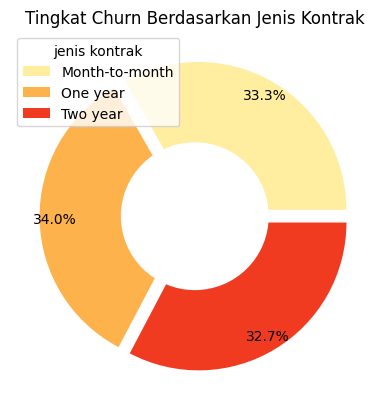

In [ ]:
# Contract
kontrak = churn_yes.groupby('Contract')['Churn'].count()
print(kontrak)

# explosion
explode = (0.05, 0.05, 0.05)

# Pie Chart
plt.pie(kontrak,
        colors=["#ffeda0","#feb24c","#f03b20"],
        autopct='%1.1f%%',
        pctdistance = 0.9,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc ='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('Tingkat Churn Berdasarkan Jenis Kontrak')
labels = kontrak.index
# Add Legends
plt.legend(labels,
           loc ="upper left",
           title="jenis kontrak")
plt.show()

PaperlessBilling
No     1473
Yes    1425
Name: Churn, dtype: int64


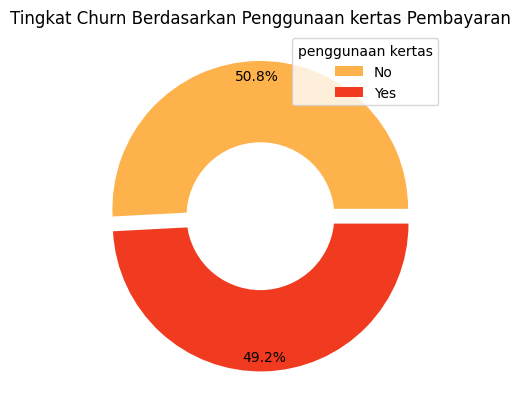

In [ ]:
# PaperlessBilling
kertasless = churn_yes.groupby('PaperlessBilling')['Churn'].count()
print(kertasless)

# explosion
explode = (0.05, 0.05)

# Pie Chart
plt.pie(kertasless,
        colors=["#feb24c","#f03b20"],
        autopct='%1.1f%%',
        pctdistance = 0.9,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc ='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('Tingkat Churn Berdasarkan Penggunaan kertas Pembayaran')
labels =kertasless.index
# Add Legends
plt.legend(labels,
           loc ="upper right",
           title="penggunaan kertas")
plt.show()

PaymentMethod
Bank transfer       692
Credit card         750
Electronic check    736
Mailed check        720
Name: Churn, dtype: int64


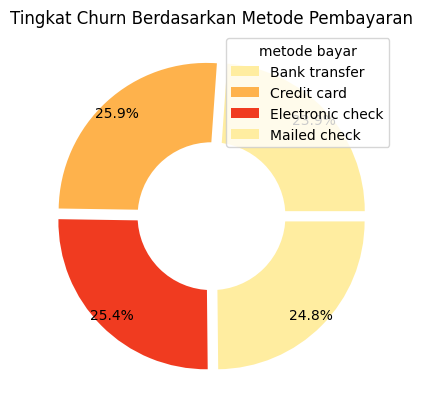

In [ ]:
# PaymentMethod
bayar = churn_yes.groupby('PaymentMethod')['Churn'].count()
print(bayar)

# explosion
explode = (0.05, 0.05, 0.05, 0.05)

# Pie Chart
plt.pie(bayar,
        colors=["#ffeda0","#feb24c","#f03b20"],
        autopct='%1.1f%%',
        pctdistance = 0.9,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc ='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('Tingkat Churn Berdasarkan Metode Pembayaran')
labels =bayar.index
# Add Legends
plt.legend(labels,
           loc ="upper right",
           title="metode bayar")
plt.show()

> **interpretasi:** Pelanggan yg menggunakan pembayaran Credit paling banyak mengalami churn.

## *BOXPLOT UNTUK DATA NUMERIK*

# INFORMASI AKUN PELANGGAN

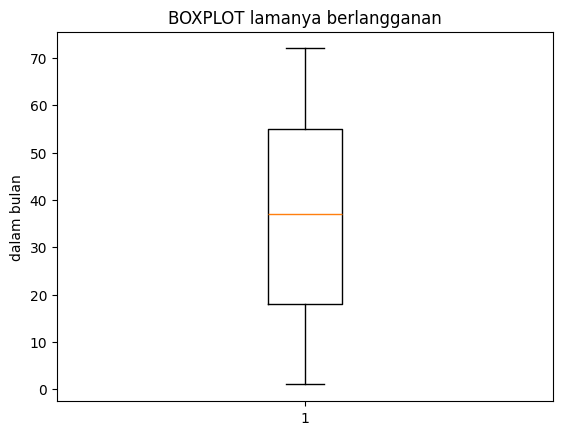

In [ ]:
# tenure
plt.boxplot(churn["tenure"])
plt.title('BOXPLOT lamanya berlangganan')
plt.ylabel('dalam bulan')
plt.show()

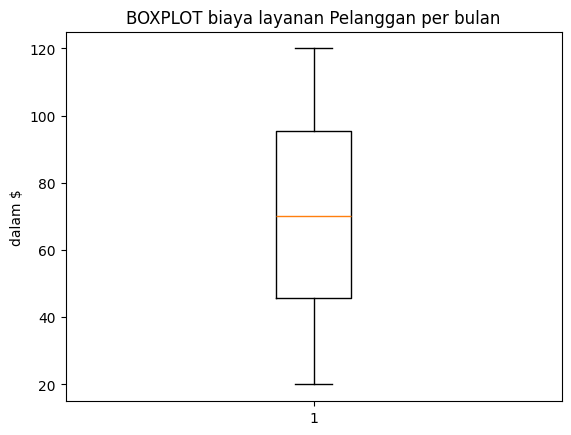

In [ ]:
# MonthlyCharges
plt.boxplot(churn["MonthlyCharges"])
plt.title('BOXPLOT biaya layanan Pelanggan per bulan')
plt.ylabel('dalam $')
plt.show()

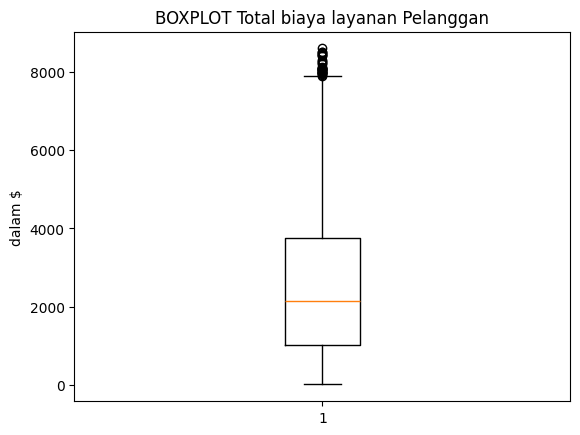

In [ ]:
# TotalCharges
plt.boxplot(churn["TotalCharges"])
plt.title('BOXPLOT Total biaya layanan Pelanggan')
plt.ylabel('dalam $')
plt.show()

## Jumlah Outlier pada "TotalCharges"
bisa dikatakan ada beberapa pelanggan yg sudah berlangganan lama dan bayaran nya lebih banyak dalam setiap bulanannya dgn layanan tersebut.

Batas Bawah: -3100.9537500000006
Batas Atas: 7888.83625
count   5880.00
mean    2566.81
std     1910.02
min       20.03
25%     1020.22
50%     2136.44
75%     3767.66
max     8589.60
Name: TotalCharges, dtype: float64


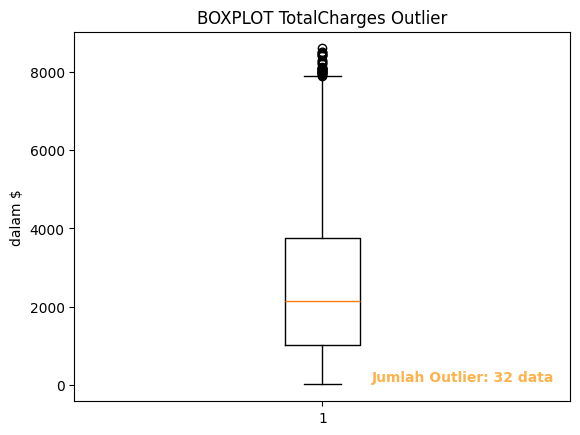

In [ ]:
# Menyimpan kolom "total" ke dalam variabel terpisah
total = churn['TotalCharges']


# Menghitung jumlah outlier
Q1 = total.quantile(0.25)
Q3 = total.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = churn[(total < lower_bound) | (total > upper_bound)]
outliers
# Menampilkan nilai batas atas dan batas bawah
print(f'Batas Bawah: {lower_bound}')
print(f'Batas Atas: {upper_bound}')
print (total.describe())

# Menambahkan teks tentang jumlah outlier
plt.text(1.1, len(outliers), f'Jumlah Outlier: {len(outliers)} data',
         verticalalignment='bottom',
         fontweight='bold', color = '#feb24c')

# Menampilkan boxplot
plt.boxplot(total)
plt.title('BOXPLOT TotalCharges Outlier')
plt.ylabel('dalam $')
plt.show()

> **intepretasi**: Ada 32 pelanggan yang telah berlangganan untuk jangka waktu yang lama dan membayar biaya langganan yang lebih tinggi setiap bulannya untuk layanan tertentu.

## Penanganan Outlier

### Metode Capping/Censoring: penggantian data outlier dengan nilai batas-batas nya

count   5880.00
mean    2565.32
std     1905.67
min       20.03
25%     1020.22
50%     2136.44
75%     3767.66
max     7888.84
Name: TotalCharges, dtype: float64


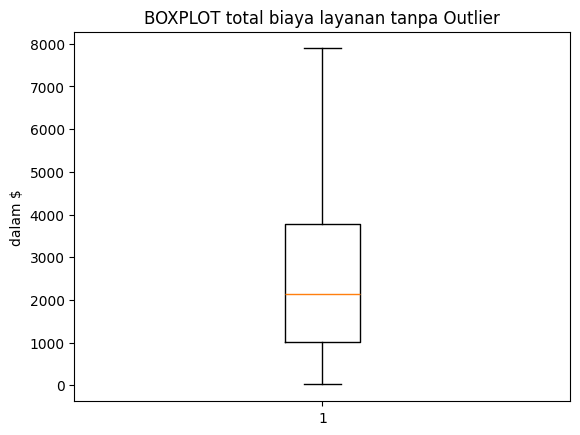

In [ ]:
from scipy import stats

# Boxplot setelah cleaning outlier
lower_bound = total.quantile(0.25) - 1.5 * stats.iqr(total)
upper_bound = total.quantile(0.75) + 1.5 * stats.iqr(total)
total_cleaned = total[(total > lower_bound) & (total < upper_bound)]

# Menyimpan data total tanpa pencilan
total_cleaned_pd = total.copy()
total_cleaned_pd.loc[total_cleaned_pd > upper_bound] = upper_bound
total_cleaned_pd.loc[total_cleaned_pd < lower_bound] = lower_bound

# Rangkuman statistik setelah cleaning outlier
summary_no_outlier = total_cleaned_pd.describe()
print(summary_no_outlier)

# BOXPLOT TANPA PENCILAN
plt.boxplot(total_cleaned_pd) # BOXPLOT TANPA PENCILAN
plt.title('BOXPLOT total biaya layanan tanpa Outlier')
plt.ylabel('dalam $')
plt.show()

#### Namun penggunaan penanganan outlier perlu diperhatikan karena berpengaruh pada distribusi atau sebaran data.

## Histogram

Text(0.5, 0, 'jumlah pelanggan')

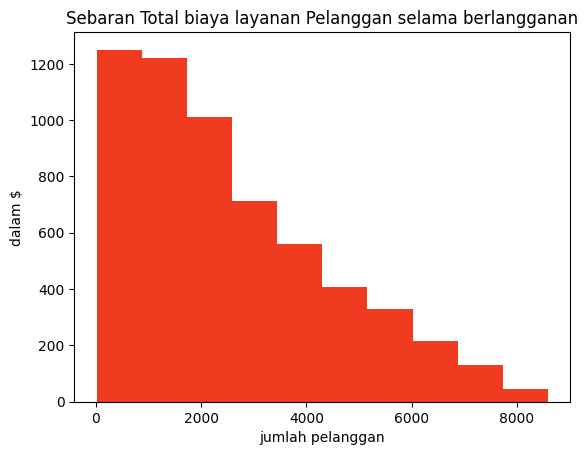

In [ ]:
plt.hist(churn['TotalCharges'], color = ["#f03b20"])
plt.title('Sebaran Total biaya layanan Pelanggan selama berlangganan')
plt.ylabel('dalam $')
plt.xlabel('jumlah pelanggan')

Text(0.5, 0, 'jumlah pelanggan')

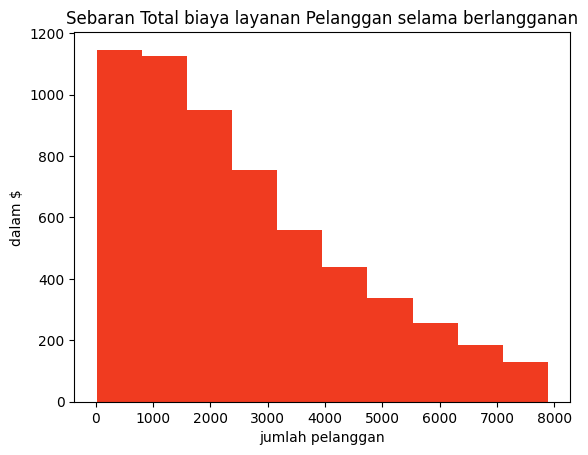

In [ ]:
# HISTOGRAM DATA Capping TOTAL yang dibayarkan oleh pelanggan
plt.hist(total_cleaned_pd, color = ["#f03b20"])
plt.title('Sebaran Total biaya layanan Pelanggan selama berlangganan')
plt.ylabel('dalam $')
plt.xlabel('jumlah pelanggan')

Text(0.5, 1.0, 'Total biaya layanan')

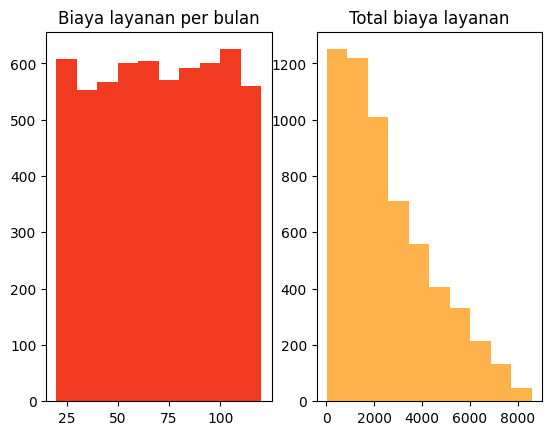

In [ ]:
plt.subplot(1,2,1)
plt.hist(churn['MonthlyCharges'], color = ["#f03b20"])
plt.title('Biaya layanan per bulan')

plt.subplot(1,2,2)
plt.hist(churn['TotalCharges'], color = ['#feb24c'])
plt.title('Total biaya layanan')

> **intepretasi**: Berarti 32 pelanggan tadi, yang telah berlangganan untuk jangka waktu yang lama, oleh karena itu total bayarannya (selama berlangganan) cenderung lebih tinggi. karena jika dilihat sebaran untuk biaya per bulannya itu cenderung rata kanan dan rata kiri / tidak miring (normal).

## Korelasi

In [ ]:
# cek tipe data
churn.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


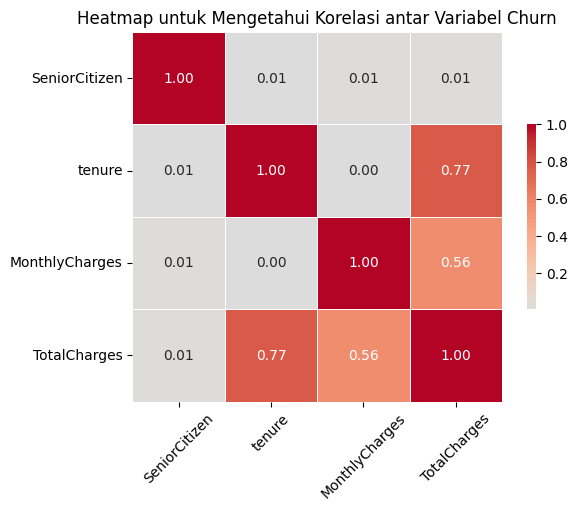

In [ ]:
# Menghitung matriks korelasi
churn_numeric = churn.select_dtypes(include=[float, int])
korelasi =churn_numeric.corr()

# Membuat heatmap dari matriks korelasi
sns.heatmap(korelasi,
            vmax=1,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5},
            annot=True, fmt='.2f',
            cmap='coolwarm')

# Menambahkan label dan judul
plt.title("Heatmap untuk Mengetahui Korelasi antar Variabel Churn")

# Memutar label sumbu x agar lebih mudah dibaca
plt.xticks(rotation = 45)
plt.show()

In [ ]:
korelasi

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.00,0.01,0.01,0.01
tenure,0.01,1.00,0.00,0.77
MonthlyCharges,0.01,0.00,1.00,0.56
TotalCharges,0.01,0.77,0.56,1.00


> **interpretasi:** Korelasi/hubungan yang paling kuat adalah lamanya tahun berlangganan (tenure) dengan biaya yang dikeluarkan oleh customer selama berlangganan (totalcharges), yaitu 0,77. Artinya, semakin lama customer berlangganan maka semakin besar biaya yang dibayar oleh customer tersebut.

# REGRESI LOGISTIK BINER

#### untuk Regresi Logistik Biner, Dummy Encoding hanya dilakukan di phyton dan analisis logistik multiple biner lebih baik dengan menggunakan software R Studio

## Data Manipulation

## Dummy Encoding

In [ ]:
# (1: Pria, 2: Wanita)
def ubah_gender(gender):
    if gender == 'Male':
        return '1'
    else:
        return '0'
churn['gender'] = churn['gender'].apply(ubah_gender)

In [ ]:
# (1: Ya, 2: Tidak)
def ubah_partner(Partner):
    if Partner == 'Yes':
        return '1'
    else:
        return '0'
churn['Partner'] = churn['Partner'].apply(ubah_partner)

In [ ]:
# (1:Ya, 0:Tidak).
def ubah_Dependents(Dependents):
    if Dependents == 'Yes':
        return '1'
    else:
        return '0'
churn['Dependents'] = churn['Dependents'].apply(ubah_Dependents)

In [ ]:
# (1:Ya, 0:Tidak).
def ubah_PhoneService(PhoneService):
    if PhoneService == 'Yes':
        return '1'
    else:
        return '0'
churn['PhoneService'] = churn['PhoneService'].apply(ubah_PhoneService)

In [ ]:
# (2:Ya, 1:Tidak, 0:Tidak ada layanan telepon).
def ubah_MultipleLines(MultipleLines):
    if MultipleLines == 'Yes':
        return '2'
    elif MultipleLines == 'No':
        return '1'
    else:
        return '0'
churn['MultipleLines'] = churn['MultipleLines'].apply(ubah_MultipleLines)

In [ ]:
#  (2:DSL, 1:Fiber optik,0: Tidak).
def ubah_InternetService(InternetService):
    if InternetService == 'DSL':
        return '2'
    elif InternetService == 'Fiber optic':
        return '1'
    else:
        return '0'
churn['InternetService'] = churn['InternetService'].apply(ubah_InternetService)

In [ ]:
# (2:Ya, 1:Tidak, 0:Tidak ada layanan internet).
def ubah_OnlineSecurity(OnlineSecurity):
    if OnlineSecurity == 'Yes':
        return '2'
    elif OnlineSecurity== 'No':
        return '1'
    else:
        return '0'
churn['OnlineSecurity'] = churn['OnlineSecurity'].apply(ubah_OnlineSecurity)

In [ ]:
# (2:Ya, 1:Tidak, 0:Tidak ada layanan internet)
def ubah_OnlineBackup(OnlineBackup):
    if OnlineBackup == 'Yes':
        return '2'
    elif OnlineBackup == 'No':
        return '1'
    else:
        return '0'
churn['OnlineBackup'] = churn['OnlineBackup'].apply(ubah_OnlineBackup)

In [ ]:
# (2:Ya, 1:Tidak, 0:Tidak ada layanan internet)
def ubah_DeviceProtection(DeviceProtection):
    if DeviceProtection == 'Yes':
        return '2'
    elif DeviceProtection == 'No':
        return '1'
    else:
        return '0'
churn['DeviceProtection'] = churn['DeviceProtection'].apply(ubah_DeviceProtection)

In [ ]:
#(2:Ya, 1:Tidak, 0:Tidak ada layanan internet)
def ubah_TechSupport(TechSupport):
    if TechSupport == 'Yes':
        return '2'
    elif TechSupport == 'No':
        return '1'
    else:
        return '0'
churn['TechSupport'] = churn['TechSupport'].apply(ubah_TechSupport)

In [ ]:
#  (2:Ya, 1:Tidak, 0:Tidak ada layanan internet).
def ubah_StreamingTV(StreamingTV):
    if StreamingTV == 'Yes':
        return '2'
    elif StreamingTV == 'No':
        return '1'
    else:
        return '0'
churn['StreamingTV'] = churn['StreamingTV'].apply(ubah_StreamingTV)

In [ ]:
# (2:Ya, 1:Tidak, 0:Tidak ada layanan internet)
def ubah_StreamingMovies(StreamingMovies):
    if StreamingMovies == 'Yes':
        return '2'
    elif StreamingMovies == 'No':
        return '1'
    else:
        return '0'
churn['StreamingMovies'] = churn['StreamingMovies'].apply(ubah_StreamingMovies)

In [ ]:
# (1:Sebulan, 2:Satu tahun, 3:Dua tahun)
def ubah_Contract(Contract):
    if Contract == 'Month-to-month':
        return '1'
    elif Contract == 'One year':
        return '2'
    else:
        return '3'
churn['Contract'] = churn['Contract'].apply(ubah_Contract)

In [ ]:
# (1:Ya, 0: Tidak)
def ubah_PaperlessBilling(PaperlessBilling):
    if PaperlessBilling == 'Yes':
        return '1'
    else:
        return '0'
churn['PaperlessBilling'] = churn['PaperlessBilling'].apply(ubah_PaperlessBilling)

In [ ]:
# (1:Cek elektronik, 2:Cek melalui pos, 3:Transfer bank, 4:Kartu kredit).
def ubah_PaymentMethod(PaymentMethod):
    if PaymentMethod == 'Electronic check':
        return '1'
    elif PaymentMethod == 'Mailed check':
        return '2'
    elif PaymentMethod == 'Bank transfer':
        return '3'
    else:
        return '4'
churn['PaymentMethod'] = churn['PaymentMethod'].apply(ubah_PaymentMethod)

In [ ]:
# (1:Ya, 0: Tidak)
def ubah_Churn(Churn):
    if Churn == 'Yes':
        return '1'
    else:
        return '0'
churn['Churn'] = churn['Churn'].apply(ubah_Churn)

In [ ]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,1,0,0,1,23,0,0,0,0,...,0,0,0,0,1,1,3,49.85,1146.55,0
1,CUST0001,0,0,1,0,43,0,0,2,2,...,2,1,2,1,1,0,2,100.70,4330.10,1
2,CUST0002,1,1,0,0,51,1,1,2,1,...,2,2,1,1,2,0,1,97.33,4963.83,1
3,CUST0003,1,1,0,0,72,1,2,2,2,...,2,1,1,1,1,0,4,101.38,7299.36,0
4,CUST0004,1,1,0,0,25,1,2,2,1,...,1,2,1,2,1,0,1,52.22,1305.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,CUST5875,1,0,1,1,71,1,1,2,2,...,1,2,1,1,1,1,2,74.21,5268.91,0
5876,CUST5876,1,0,0,0,22,1,2,2,1,...,2,2,1,2,2,0,2,65.43,1439.46,1
5877,CUST5877,0,0,0,0,68,0,0,1,2,...,2,2,2,1,2,1,3,59.78,4065.04,0
5878,CUST5878,0,0,1,1,14,0,0,1,2,...,2,2,2,2,1,1,2,91.88,1286.32,0


## menyimpan data dummy ke dalam csv untuk pengolahan di R studio

churn.to_csv ("churn_logistik.csv", sep = ';', index = False)

## REGRESI LOGISTIK BINER

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_harvey_collier


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# menentukan prediktor (x) dan y
X = churn[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
           'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
           'MonthlyCharges']]
y = np.asarray(churn['Churn'])


# Split the data into training and testing sets (data training = 80% & data testing = 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Meningkatkan jumlah iterasi dari default (100) menjadi 200
model = LogisticRegression(max_iter=200)

# Fit the model on the training data
logreg_model .fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg_model .predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.48
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.63      0.55       584
           1       0.48      0.34      0.40       592

    accuracy                           0.48      1176
   macro avg       0.48      0.49      0.47      1176
weighted avg       0.48      0.48      0.47      1176



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Laporan Klasifikasi Data Churn Pelanggan

1. **Akurasi (Accuracy)**:
   - **49%**: Model berhasil memprediksi churn dengan benar pada 49% dari semua sampel. Ini menunjukkan bahwa **model tidak terlalu akurat.**

2. **Presisi (Precision)**:
   - **Kelas 0 (Tidak Churn)**: 49%
     - Dari semua prediksi yang mengatakan pelanggan tidak churn, 49% dari prediksi tersebut benar.
   - **Kelas 1 (Churn)**: 48%
     - Dari semua prediksi yang mengatakan pelanggan akan churn, 48% dari prediksi tersebut benar.
   - **Presisi**: Mengukur ketepatan prediksi positif model.

3. **Recall (Daya Ingat)**:
   - **Kelas 0 (Tidak Churn)**: 63%
     - Dari semua pelanggan yang *sebenarnya tidak churn*, 63% berhasil diidentifikasi dengan benar oleh model.
   - **Kelas 1 (Churn)**: 34%
     - Dari semua pelanggan yang *sebenarnya churn*, hanya 34% yang berhasil diidentifikasi dengan benar oleh model.
   - **Recall**: Mengukur seberapa baik model dalam menemukan semua kasus positif aktual.

4. **F1-Score**:
   - **Kelas 0 (Tidak Churn)**: 0.55
   - **Kelas 1 (Churn)**: 0.40
   - **F1-Score**: Rata-rata harmonis dari presisi dan recall.
   Memberikan gambaran umum tentang keseimbangan antara presisi dan recall.

5. **Support (Dukungan)**:
   - **Kelas 0 (Tidak Churn)**: 584 sampel
   - **Kelas 1 (Churn)**: 592 sampel
   - **Support**: Jumlah sampel sebenarnya di setiap kelas.

6. **Rata-rata Makro (Macro Avg)**:
   - **Presisi**: 0.49
   - **Recall**: 0.49
   - **F1-Score**: 0.48
   - **Rata-rata Makro**: Rata-rata sederhana dari metrik-metrik untuk kedua kelas, tanpa memperhitungkan proporsi tiap kelas.

7. **Rata-rata Terbobot (Weighted Avg)**:
   - **Presisi**: 0.49
   - **Recall**: 0.49
   - **F1-Score**: 0.47
   - **Rata-rata Terbobot**: Rata-rata dari metrik-metrik untuk kedua kelas, memperhitungkan jumlah sampel di setiap kelas.

### Kesimpulan

- **Kinerja Model**: Model saat ini memiliki kinerja yang kurang baik dengan akurasi hanya 49%. Ini berarti model tidak jauh lebih baik dari tebakan acak.
- **Prediksi Churn**: Model lebih baik dalam mengidentifikasi pelanggan yang tidak churn (0) dibandingkan dengan pelanggan yang churn (1).
- **Saran**: Model perlu ditingkatkan, baik melalui pemilihan model yang lebih sesuai, preprocessing data, atau tuning hyperparameter.

# REGRESI LOGISTIK py spark

In [ ]:
# IMPORT pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as fn
from pyspark.mllib.stat import Statistics

# import untuk regresi logistik
from pyspark.ml.feature import VectorAssembler # gabungkan vektor predictor menjadi satu kolom
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import Vectors

import matplotlib.pyplot as plt

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master('local').getOrCreate() ##spark object

# load data

In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/customer_churn_data.csv'

In [ ]:
churn1=spark.read.csv(path,inferSchema=True, header=True, sep = ";")
churn1.show(6)

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+----------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessBilling|   PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+----------------+--------------+------------+-----+
|  CUST0000|  Male|            0|     No|       Yes|    23|          No|N

In [ ]:
churn2=churn1.withColumn("Churn", fn.when(fn.col("Churn") == 'Yes' , 1).otherwise(0)) # menggunakan fn

# Dummy Encoding Py Spark

In [ ]:
churn2=churn1.withColumn("gender", fn.when(fn.col("gender") == 'Male', 1).otherwise(0))

In [ ]:
churn2=churn1.withColumn("Partner", fn.when(fn.col("Partner") == 'Yes' , 1).otherwise(0))

In [ ]:
churn2=churn1.withColumn("Dependents", fn.when(fn.col("Dependents") == 'Yes' , 1).otherwise(0))

In [ ]:
churn2=churn1.withColumn("PhoneService", fn.when(fn.col("PhoneService") == 'Yes' , 1).otherwise(0))

In [ ]:
churn2=churn1.withColumn("MultipleLines", fn.when(fn.col("MultipleLines") == 'Yes', 2).when(fn.col("MultipleLines") == 'No', 1).otherwise(0))

In [ ]:
churn2=churn1.withColumn("InternetService", fn.when(fn.col("InternetService") == 'DSL', 2).when(fn.col("InternetService") == 'Fiber optic', 1).otherwise(0))

In [ ]:
churn2=churn1.withColumn("OnlineSecurity", fn.when(fn.col("OnlineSecurity") == 'Yes', 2).when(fn.col("OnlineSecurity") == 'No', 1).otherwise(0))

In [ ]:
churn2=churn1.withColumn(
    "OnlineBackup",
    fn.when(fn.col("OnlineBackup") == 'Yes', 2)
      .when(fn.col("OnlineBackup") == 'No', 1)
      .otherwise(0)
)

In [ ]:
churn2=churn1.withColumn(
    "DeviceProtection",
    fn.when(fn.col("DeviceProtection") == 'Yes', 2)
      .when(fn.col("DeviceProtection") == 'No', 1)
      .otherwise(0)
)

In [ ]:
churn2=churn1.withColumn(
    "TechSupport",
    fn.when(fn.col("TechSupport") == 'Yes', 2)
      .when(fn.col("TechSupport") == 'No', 1)
      .otherwise(0)
)

In [ ]:
churn2=churn1.withColumn(
    "StreamingTV",
    fn.when(fn.col("StreamingTV") == 'Yes', 2)
      .when(fn.col("StreamingTV") == 'No', 1)
      .otherwise(0)
)

In [ ]:
churn2=churn1.withColumn(
    "StreamingMovies",
    fn.when(fn.col("StreamingMovies") == 'Yes', 2)
      .when(fn.col("StreamingMovies") == 'No', 1)
      .otherwise(0)
)

In [ ]:
churn2=churn1.withColumn(
    "Contract",
    fn.when(fn.col("Contract") == 'Month-to-month', 1)
      .when(fn.col("Contract") == 'One year', 2)
      .otherwise(3)
)

In [ ]:
churn2=churn1.withColumn(
    "PaperlessBilling",
    fn.when(fn.col("PaperlessBilling") == 'Yes' , 1)
    .otherwise(0))

In [ ]:
churn2=churn1.withColumn(
    "PaymentMethod",
    fn.when(fn.col("PaymentMethod") == 'Electronic check', '1')
      .when(fn.col("PaymentMethod") == 'Mailed check', '2')
      .when(fn.col("PaymentMethod") == 'Bank transfer', '3')
      .otherwise('4')
)

In [ ]:
churn2.show()

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+-------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessBilling|PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+-------------+--------------+------------+-----+
|  CUST0000|  Male|            0|     No|       Yes|    23|          No|No phone s

## Membuat kolom prediktor (X)

In [ ]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCols=[
    "gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
    "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "Contract", "PaperlessBilling", "PaymentMethod", "Churn"
],
outputCols=[
    "gender_index", "Partner_index", "Dependents_index", "PhoneService_index", "MultipleLines_index",
    "InternetService_index", "OnlineSecurity_index", "OnlineBackup_index",
    "DeviceProtection_index", "TechSupport_index", "StreamingTV_index", "StreamingMovies_index",
    "Contract_index", "PaperlessBilling_index", "PaymentMethod_index", "Churn_index"
])

churn2= indexer.fit(churn1).transform(churn1)
churn2.show()

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+----------------+--------------+------------+-----+------------+-------------+----------------+------------------+-------------------+---------------------+--------------------+------------------+----------------------+-----------------+-----------------+---------------------+--------------+----------------------+-------------------+-----------+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessBilling|   PaymentMethod|MonthlyCharges|TotalCharges|Churn|gender_index|Partner_index|Dependents_index|PhoneService_index|MultipleLines_index|Inte

In [ ]:
# membuat kolom vektor prediktor
Pred_corr= ["gender_index", "Partner_index", "Dependents_index", "PhoneService_index", "MultipleLines_index",
    "InternetService_index", "OnlineSecurity_index", "OnlineBackup_index",
    "DeviceProtection_index", "TechSupport_index", "StreamingTV_index", "StreamingMovies_index",
    "Contract_index", "PaperlessBilling_index", "PaymentMethod_index","MonthlyCharges"]
### Churn --> variabel respon (Y))

In [ ]:
# Creating vector column which will contain all the feature columns (fitur kolom)
vector_col = "Predictors"
assembler = VectorAssembler(inputCols=Pred_corr,
                            outputCol=vector_col) ##assemble the inputs and outputs
output = assembler.transform(churn2)

In [ ]:
# Selecting only needful columns
vector=output.select("Predictors","Churn_index") ## beberapa variabel X, variabel target/respon (Y)

In [ ]:
vector.show(truncate=False)

+--------------------------------------------------------------------+-----------+
|Predictors                                                          |Churn_index|
+--------------------------------------------------------------------+-----------+
|(16,[1,2,3,13,14,15],[1.0,1.0,1.0,1.0,3.0,49.85])                   |0.0        |
|[1.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,100.7] |1.0        |
|[0.0,1.0,0.0,0.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,0.0,1.0,97.33] |1.0        |
|[0.0,1.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,101.38]|0.0        |
|[0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,52.22] |1.0        |
|[1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,116.96]|0.0        |
|[0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,3.0,91.53] |1.0        |
|[0.0,0.0,1.0,0.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,26.52] |1.0        |
|[0.0,1.0,0.0,1.0,0.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,0.0,2.0,67.77] |1.0        |
|(16

In [ ]:
### split data into training and testing
train_data,test_data=vector.randomSplit([0.8,0.2])
## 80% for training, 20% for testing

In [ ]:
churn.count()

,0
customerID,5880
gender,5880
SeniorCitizen,5880
Partner,5880
Dependents,5880
tenure,5880
PhoneService,5880
MultipleLines,5880
InternetService,5880
OnlineSecurity,5880


In [ ]:
train_data.count()

4700

In [ ]:
test_data.count()

1180

In [ ]:
# menginisialisasi model regresi logistik
regressor=LogisticRegression(featuresCol="Predictors",labelCol="Churn_index",maxIter=1000) # iterasi/pengulangan max sampai ke 1000

In [ ]:
##predict on training dataset
lr_model = regressor.fit(train_data) ##.fit

In [ ]:
lr_model.intercept

0.06567799083703227

In [ ]:
lr_model.coefficients

DenseVector([-0.0618, -0.0387, -0.0284, -0.0517, -0.0664, -0.0385, 0.0092, 0.0856, -0.0838, -0.0756, 0.0219, 0.0456, 0.0148, 0.0083, -0.0036, 0.0006])

# Evaluasi model dengan ROC

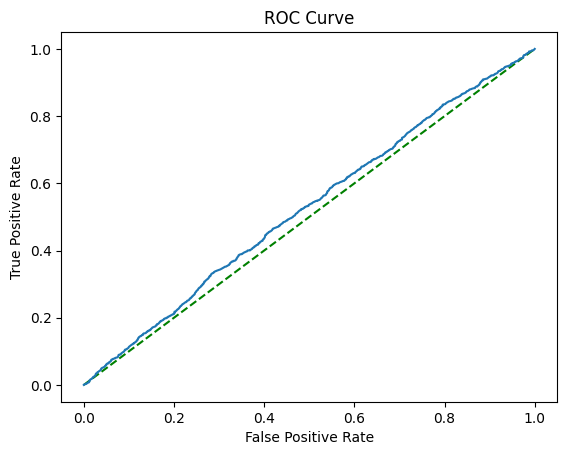

TrainSet areaUnderROC: 0.5254558356237456


In [ ]:
lr_model_summary = lr_model.summary
roc = lr_model_summary.roc.toPandas()

plt.plot([0, 1], [0, 1], 'g--')
plt.plot(roc['FPR'],roc['TPR'])

#FPR (False Positive Rate) di sumbu-x
#TPR (True Positive Rate) di sumbu-y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve')
plt.show()
print('TrainSet areaUnderROC: ' + str(lr_model_summary.areaUnderROC))

Interpretasi:

Dalam regresi logistik, bisa memvisualisasikan kualitas model dengan menggunakan grafik Area Under the Curve (AUC). Dan diperoleh, Nilai AUC yang dihasilkan adalah 0.525.

Menurut kriteria Hosmer et al., 2013, Model churn_reglog hanya sedikit lebih baik dari acak. Termasuk dalam kategori “poor discrimination”. Masih perlu peningkatan fitur, pemilihan model, atau teknik balancing data.
sumber: Hosmer, D., Lemeshow, S., & Sturdivant, R. X. (2013). Applied Logistic Regression.3rd edn John New York: Wiley;

In [ ]:
# evaluasi klasifikasi biner
lr_model_test = regressor.fit(test_data) ##.fit

In [ ]:
lr_model_test = lr_model.transform(test_data) ##.fit

evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction', labelCol='Churn_index')
print('Test Area Under ROC', evaluator.evaluate(lr_model_test))
# menghitung luas dibawah kurva ROC

Test Area Under ROC 0.5066033937302269


In [ ]:
from pyspark.sql import Row
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import when, col

# 1. Ambil input manual dari pengguna
input_data = []
for fitur in Pred_corr:
    nilai = float(input(f"Masukkan nilai untuk {fitur}: "))
    input_data.append(nilai)

# 2. Buat DataFrame dari input
row_input = Row(*Pred_corr)
data_baru = spark.createDataFrame([row_input(*input_data)])

# 3. Gabungkan semua kolom fitur jadi satu kolom vektor "Predictors"
assembler = VectorAssembler(inputCols=Pred_corr, outputCol="Predictors")
data_baru_vector = assembler.transform(data_baru)

# 4. Gunakan model regresi logistik yang sudah dilatih untuk prediksi
hasil = lr_model.transform(data_baru_vector)

# 5. Ubah label prediksi numerik menjadi label klasifikasi (1 = churn, 0 = tidak)
hasil = hasil.withColumn("Prediksi_customer",
                         when(col("prediction") == 1.0, "Churn").otherwise("Tidak Churn"))

# 6. Tampilkan hasil prediksi
hasil.select("prediction", "Prediksi_customer").show()

Masukkan nilai untuk gender_index: 1
Masukkan nilai untuk Partner_index: 2
Masukkan nilai untuk Dependents_index: 1
Masukkan nilai untuk PhoneService_index: 2
Masukkan nilai untuk MultipleLines_index: 3
Masukkan nilai untuk InternetService_index: 2
Masukkan nilai untuk OnlineSecurity_index: 2
Masukkan nilai untuk OnlineBackup_index: 2
Masukkan nilai untuk DeviceProtection_index: 2
Masukkan nilai untuk TechSupport_index: 1
Masukkan nilai untuk StreamingTV_index: 1
Masukkan nilai untuk StreamingMovies_index: 1
Masukkan nilai untuk Contract_index: 2
Masukkan nilai untuk PaperlessBilling_index: 2
Masukkan nilai untuk PaymentMethod_index: 2
Masukkan nilai untuk MonthlyCharges: 50
+----------+-----------------+
|prediction|Prediksi_customer|
+----------+-----------------+
|       0.0|      Tidak Churn|
+----------+-----------------+

